In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
from pathlib import Path
Path("/gdrive/MyDrive/Colab Notebooks/").mkdir(parents=True, exist_ok=True)
%ls /gdrive/MyDrive/Colab\ Notebooks/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
Classification.ipynb                       obesity_test.csv     outlier_flagging.png
correlation_heatmap.png                    obesity_test_X.csv   processed_train_X.csv
distribution/                              obesity_test_y.csv   processed_train_y.csv
evaluation/                                obesity_train.csv    RamdonForest.ipynb
low_variance_features.png                  obesity_train_X.csv  summary/
models/                                    obesity_train_y.csv  target_balance.png
ObesityDataSet_raw_and_data_sinthetic.csv  outlier/             Term_Project_Preprocessing.ipynb


In [ ]:
import pandas as pd
# Load the datasets
X = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/processed_train_X.csv') #TODO use all columns
y = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/processed_train_y.csv')
Path("/gdrive/MyDrive/Colab Notebooks/evaluation/").mkdir(parents=True, exist_ok=True)
X.drop('outlier_flag', axis=1, inplace=True)
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          1688 non-null   int64
 1   Age                             1688 non-null   int64
 2   family_history_with_overweight  1688 non-null   int64
 3   FAVC                            1688 non-null   int64
 4   FCVC                            1688 non-null   int64
 5   NCP                             1688 non-null   int64
 6   CAEC                            1688 non-null   int64
 7   CH2O                            1688 non-null   int64
 8   FAF                             1688 non-null   int64
 9   TUE                             1688 non-null   int64
 10  CALC                            1688 non-null   int64
dtypes: int64(11)
memory usage: 145.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data column

In [ ]:
from sklearn.model_selection import train_test_split
# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1350, 11), (338, 11), (1350, 1), (338, 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical labels into integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fit and transform on testing data


# Retrieve the mapping of original labels to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping (Original -> Encoded):", label_mapping)

# Encode categorical labels into integers
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)  # Fit and transform on testing data


# Retrieve the mapping of original labels to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping (Original -> Encoded):", label_mapping)

Label Mapping (Original -> Encoded): {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
Label Mapping (Original -> Encoded): {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Shapes of the datasets
print("Original Training Set Shape:", X_train.shape, y_train.shape)
print("After SMOTE Training Set Shape:", X_train_smote.shape, y_train_smote.shape)
print("Test Set Shape (unchanged):", X_test.shape, y_test.shape)

Original Training Set Shape: (1350, 11) (1350,)
After SMOTE Training Set Shape: (1540, 11) (1540,)
Test Set Shape (unchanged): (338, 11) (338,)


In [ ]:
# TODO all features vs. selected features

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def prediction(model, X):
    # Predict on the given dataset
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)  # Full probability matrix for multi-class
    return y_pred, y_proba

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Scores in training dataset
    y_pred, y_proba = prediction(model, X_train)
    train_f1_macro = f1_score(y_train, y_pred, average='macro')
    train_auroc = roc_auc_score(y_train, y_proba, multi_class='ovr')  # One-vs-rest approach
    train_accuracy = accuracy_score(y_train, y_pred)  # Top-1 Accuracy

    print(f"Macro F1-Score on Train Set: {train_f1_macro:.4f}")
    print(f"AUROC Score on Train Set: {train_auroc:.4f}")
    print(f"Top-1 Accuracy on Train Set: {train_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

    # Scores in testing dataset
    y_pred, y_proba = prediction(model, X_test)
    test_f1_macro = f1_score(y_test, y_pred, average='macro')
    test_auroc = roc_auc_score(y_test, y_proba, multi_class='ovr')  # One-vs-rest approach
    test_accuracy = accuracy_score(y_test, y_pred)  # Top-1 Accuracy

    print(f"Macro F1-Score on Test Set: {test_f1_macro:.4f}")
    print(f"AUROC Score on Test Set: {test_auroc:.4f}")
    print(f"Top-1 Accuracy on Test Set: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return {
        'f1_score_train': train_f1_macro,
        'roc_auc_train': train_auroc,
        'accuracy_train': train_accuracy,
        'f1_score_test': test_f1_macro,
        'roc_auc_test': test_auroc,
        'accuracy_test': test_accuracy
    }

# Ensure y_train and y_test are in the correct shape
y_train = y_train.ravel()  # Convert to NumPy array and flatten to 1D
y_test = y_test.ravel()

# List to store model scores
f1_score_train = []
roc_auc_score_train = []
accuracy_score_train = []
f1_score_test = []
roc_auc_score_test = []
accuracy_score_test = []

# Default models
models_default = [
    # TODO LightGBM、CatBoost
    RandomForestClassifier(
        class_weight='balanced',
        max_depth=10,            # Prevent overly deep trees
        min_samples_split=5,     # Require more samples to split
        min_samples_leaf=2,      # Prevent small leaf nodes
        n_estimators=200,        # Use more trees
        max_features='sqrt'      # Use square root of total features
    ),
    GradientBoostingClassifier(
        learning_rate=0.05,       # Smaller learning rate for better generalization
        n_estimators=200,         # Moderate number of trees
        max_depth=3,              # Simpler trees
        subsample=0.8,            # Random subset of data for each tree
        min_samples_split=10,     # Require more samples to split
        min_samples_leaf=5,       # Avoid small leaf nodes
        max_features='sqrt',      # Limit features per split
        random_state=42
    ),
    XGBClassifier(
        max_depth=5,             # Limit depth to control complexity
        learning_rate=0.05,      # Smaller learning rate
        subsample=0.8,           # Randomly sample 80% of data per tree
        colsample_bytree=0.8,    # Use 80% of features per tree
        n_estimators=300,        # More trees for lower learning rate
        gamma=1,                 # Penalize splits with low loss reduction
        min_child_weight=3       # Ensure sufficient instances per leaf
    )
]
model_names = []

for model in models_default:
    model_names.append(model.__class__.__name__)
    model.fit(X_train, y_train)
    scores = evaluate_model(model, X_train, y_train, X_test, y_test)
    f1_score_train.append(scores['f1_score_train'])
    roc_auc_score_train.append(scores['roc_auc_train'])
    accuracy_score_train.append(scores['accuracy_train'])
    f1_score_test.append(scores['f1_score_test'])
    roc_auc_score_test.append(scores['roc_auc_test'])
    accuracy_score_test.append(scores['accuracy_test'])

# Compile results
results = pd.DataFrame()
results['Model_Name'] = model_names
train_test_f1_score_difference = np.subtract(f1_score_train, f1_score_test)  # To Check Overfitting/Underfitting
results['Top-1 Accuracy on Test Set'] = accuracy_score_test
results['F1_Score on Test Set'] = f1_score_test
results['ROC_AUC_Score on Test Set'] = roc_auc_score_test
results['Top-1 Accuracy on Train Set'] = accuracy_score_train
results['F1_Score on Train Set'] = f1_score_train
results['ROC_AUC_Score on Train Set'] = roc_auc_score_train
results['Difference of F1_Score on train and test'] = train_test_f1_score_difference
results = results.sort_values(by=['Top-1 Accuracy on Test Set', 'Difference of F1_Score on train and test'], ascending=[False, True])
results.to_csv('/gdrive/MyDrive/Colab Notebooks/evaluation/default_models_results.csv', index=False)
results


Macro F1-Score on Train Set: 0.8895
AUROC Score on Train Set: 0.9908
Top-1 Accuracy on Train Set: 0.8911
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       169
           1       0.86      0.84      0.85       183
           2       0.88      0.83      0.85       220
           3       0.84      0.98      0.91       186
           4       0.98      1.00      0.99       217
           5       0.85      0.83      0.84       184
           6       0.89      0.80      0.85       191

    accuracy                           0.89      1350
   macro avg       0.89      0.89      0.89      1350
weighted avg       0.89      0.89      0.89      1350

Macro F1-Score on Test Set: 0.7573
AUROC Score on Test Set: 0.9499
Top-1 Accuracy on Test Set: 0.7633
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        47
           1       0.52      0.52      0.

,Model_Name,Top-1 Accuracy on Test Set,F1_Score on Test Set,ROC_AUC_Score on Test Set,Top-1 Accuracy on Train Set,F1_Score on Train Set,ROC_AUC_Score on Train Set,Difference of F1_Score on train and test
0,RandomForestClassifier,0.763314,0.757324,0.949931,0.891111,0.889539,0.990770,0.132215
2,XGBClassifier,0.727811,0.722065,0.936985,0.805926,0.799402,0.973018,0.077337
1,GradientBoostingClassifier,0.721893,0.716033,0.932632,0.827407,0.822172,0.979002,0.106139


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Parameter grids for each model
param_grids = {
    "RandomForestClassifier": {
        'max_depth': [10, 20],
        'n_estimators': [100, 200],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    "GradientBoostingClassifier": {
        'learning_rate': [0.01, 0.05],
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'subsample': [0.7, 0.8],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 5]
    },
    "XGBClassifier": {
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.05],
        'n_estimators': [100, 300],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1],
        'min_child_weight': [1, 3]
    }
}

# Models
models = {
    "RandomForestClassifier": RandomForestClassifier(class_weight='balanced', random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, random_state=42)
}


# List to store model scores
f1_score_train = []
roc_auc_score_train = []
accuracy_score_train = []
f1_score_test = []
roc_auc_score_test = []
accuracy_score_test = []
parameters = []
# Results storage
model_names = []

# Perform GridSearchCV for each model
for model_name, model in models.items():
    model_names.append(model.__class__.__name__)
    print(f"Tuning {model_name}...")
    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1,          # Parallelize the search
        verbose=1,
        n_iter=10           # Fewer iterations
    )
    grid_search.fit(X_train, y_train)
    # TODO Show average scores

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")

    # Evaluate the best model
    scores = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    f1_score_train.append(scores['f1_score_train'])
    roc_auc_score_train.append(scores['roc_auc_train'])
    accuracy_score_train.append(scores['accuracy_train'])
    f1_score_test.append(scores['f1_score_test'])
    roc_auc_score_test.append(scores['roc_auc_test'])
    accuracy_score_test.append(scores['accuracy_test'])
    parameters.append(best_params)

# Compile results
results = pd.DataFrame()
results['Model_Name'] = model_names
train_test_f1_score_difference = np.subtract(f1_score_train, f1_score_test)  # To Check Overfitting/Underfitting
results['Top-1 Accuracy on Test Set'] = accuracy_score_test
results['F1_Score on Test Set'] = f1_score_test
results['ROC_AUC_Score on Test Set'] = roc_auc_score_test
results['Top-1 Accuracy on Train Set'] = accuracy_score_train
results['F1_Score on Train Set'] = f1_score_train
results['ROC_AUC_Score on Train Set'] = roc_auc_score_train
results['Difference of F1_Score on train and test'] = train_test_f1_score_difference
results['Best Parameters'] = parameters
results = results.sort_values(by=['Top-1 Accuracy on Test Set', 'Difference of F1_Score on train and test'], ascending=[False, True])
# Save results
results.to_csv('/gdrive/MyDrive/Colab Notebooks/evaluation/tuned_models_results.csv', index=False)
results

Tuning RandomForestClassifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for RandomForestClassifier: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Macro F1-Score on Train Set: 0.9799
AUROC Score on Train Set: 0.9996
Top-1 Accuracy on Train Set: 0.9800
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       0.99      0.97      0.98       183
           2       0.99      0.97      0.98       220
           3       0.95      0.99      0.97       186
           4       0.99      1.00      1.00       217
           5       0.95      0.97      0.96       184
           6       0.98      0.96      0.97       191

    accuracy                           0.98      1350
   macro avg       0.98      0.98      0.98      1350
weighted avg       0.98      0.98      0.98      1350

Macro F1-Score on Test Set: 0.7862
AUROC Score on Test Set: 0.9610
Top-1 Accuracy on Test Set: 0.7899
Classification Repo

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:59:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBClassifier: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Macro F1-Score on Train Set: 0.8642
AUROC Score on Train Set: 0.9849
Top-1 Accuracy on Train Set: 0.8674
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       169
           1       0.86      0.78      0.81       183
           2       0.82      0.84      0.83       220
           3       0.82      0.98      0.89       186
           4       0.98      1.00      0.99       217
           5       0.82      0.77      0.79       184
           6       0.88      0.76      0.82       191

    accuracy                           0.87      1350
   macro avg       0.87      0.87      0.86      1350
weighted avg       0.87      0.87      0.87      1350

Macro F1-Score on Test Set: 0.7663
AUROC Score on Test Set: 0.9406
Top-1 Accuracy on Test Set: 0.7692

,Model_Name,Top-1 Accuracy on Test Set,F1_Score on Test Set,ROC_AUC_Score on Test Set,Top-1 Accuracy on Train Set,F1_Score on Train Set,ROC_AUC_Score on Train Set,Difference of F1_Score on train and test,Best Parameters
0,RandomForestClassifier,0.789941,0.786233,0.960973,0.980000,0.979913,0.999556,0.193680,"{'n_estimators': 200, 'min_samples_split': 2, ..."
1,GradientBoostingClassifier,0.781065,0.775714,0.949732,0.974074,0.973990,0.999346,0.198276,"{'subsample': 0.8, 'n_estimators': 200, 'min_s..."
2,XGBClassifier,0.769231,0.766319,0.940646,0.867407,0.864226,0.984908,0.097907,"{'subsample': 1.0, 'n_estimators': 100, 'min_c..."


In [ ]:
# TODO ensemble vs. best model

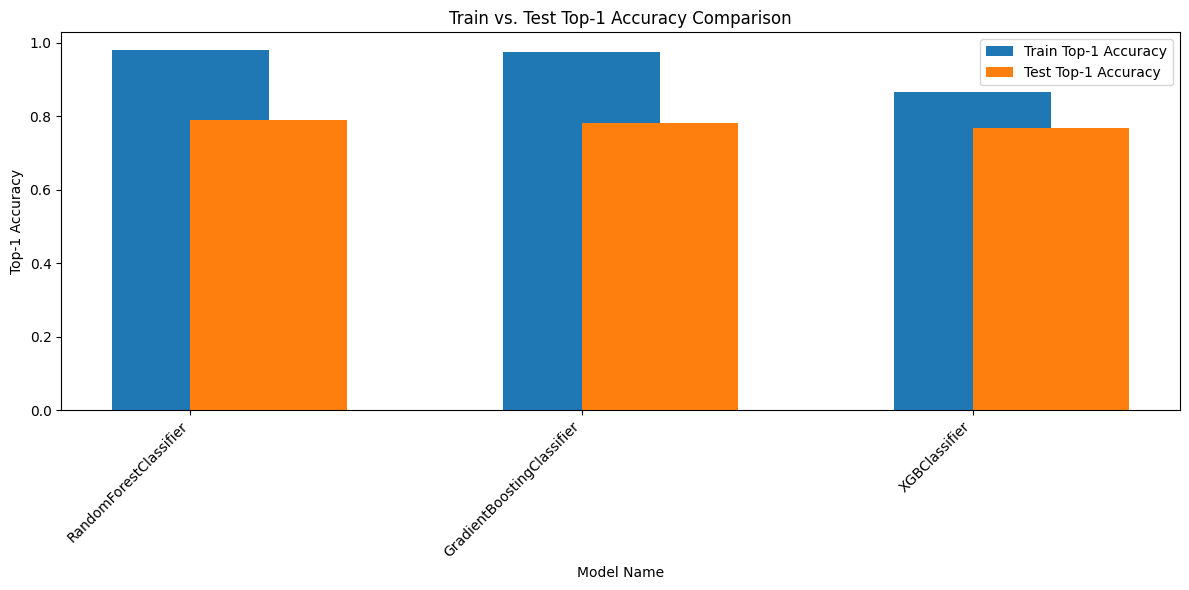

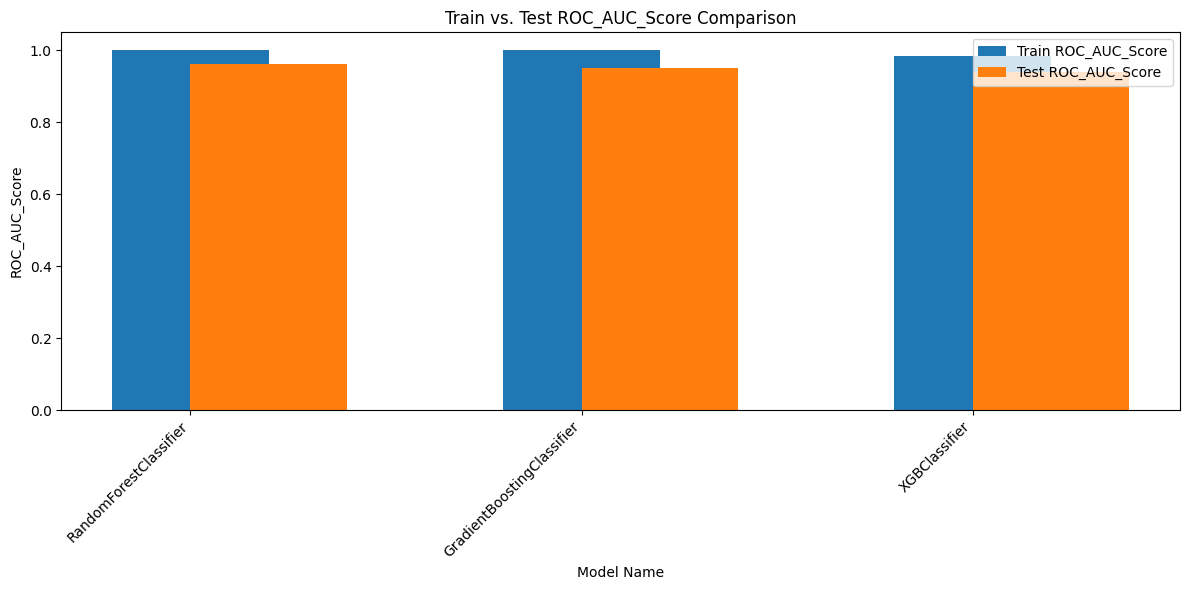

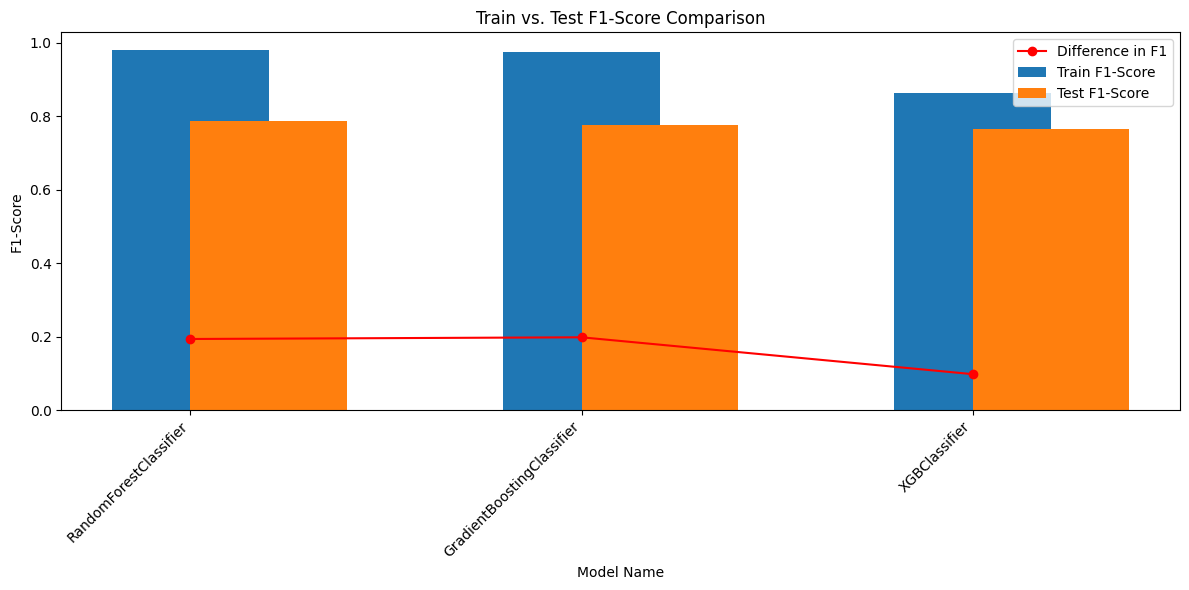

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for Top-1 Accuracy
plt.figure(figsize=(12, 6))
x = results['Model_Name']

# Train Top-1 Accuracy
plt.bar(x, results['Top-1 Accuracy on Train Set'], width=0.4, label='Train Top-1 Accuracy', align='center')

# Test Top-1 Accuracy
plt.bar(x, results['Top-1 Accuracy on Test Set'], width=0.4, label='Test Top-1 Accuracy', align='edge')

plt.xticks(rotation=45, ha='right')
plt.title('Train vs. Test Top-1 Accuracy Comparison')
plt.xlabel('Model Name')
plt.ylabel('Top-1 Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Bar plot for ROC_AUC_Score
plt.figure(figsize=(12, 6))
x = results['Model_Name']

# Train ROC_AUC_Score
plt.bar(x, results['ROC_AUC_Score on Train Set'], width=0.4, label='Train ROC_AUC_Score', align='center')

# Test ROC_AUC_Score
plt.bar(x, results['ROC_AUC_Score on Test Set'], width=0.4, label='Test ROC_AUC_Score', align='edge')

plt.xticks(rotation=45, ha='right')
plt.title('Train vs. Test ROC_AUC_Score Comparison')
plt.xlabel('Model Name')
plt.ylabel('ROC_AUC_Score')
plt.legend()
plt.tight_layout()
plt.show()

# Bar plot for F1-Score and its difference
plt.figure(figsize=(12, 6))
x = results['Model_Name']

# Train F1-Score
plt.bar(x, results['F1_Score on Train Set'], width=0.4, label='Train F1-Score', align='center')

# Test F1-Score
plt.bar(x, results['F1_Score on Test Set'], width=0.4, label='Test F1-Score', align='edge')

# Difference in F1-Score
plt.plot(x, results['Difference of F1_Score on train and test'], color='red', marker='o', label='Difference in F1')

plt.xticks(rotation=45, ha='right')
plt.title('Train vs. Test F1-Score Comparison')
plt.xlabel('Model Name')
plt.ylabel('F1-Score')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Find the row corresponding to the best model
best_model_row = results.iloc[results['Top-1 Accuracy on Test Set'].idxmax()]

# Extract model name and best parameters
best_model_name = best_model_row['Model_Name']
best_parameters = best_model_row['Best Parameters']

print("Best Model:", best_model_name)
print("Best Parameters:", best_parameters)

# Map model names to their corresponding classes
model_classes = {
    "RandomForestClassifier": RandomForestClassifier,
    "GradientBoostingClassifier": GradientBoostingClassifier,
    "XGBClassifier": XGBClassifier
}

# Instantiate the best model with its parameters
BestModelClass = model_classes[best_model_name]
best_model = BestModelClass(**best_parameters)
# Train the best model
best_model.fit(X_train, y_train)

print(f"{best_model_name} has been trained with the best parameters.")
# Evaluate the best model on the test set
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Best Model on Test Set: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

import joblib

# Save the trained best model
joblib.dump(best_model, '/gdrive/MyDrive/Colab Notebooks/evaluation/best_model.pkl')
print("Best model saved successfully.")


Best Model: RandomForestClassifier
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
RandomForestClassifier has been trained with the best parameters.
Accuracy of the Best Model on Test Set: 0.7899
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.53      0.50      0.51        42
           2       0.77      0.77      0.77        53
           3       0.83      0.85      0.84        53
           4       0.96      0.98      0.97        44
           5       0.77      0.82      0.80        50
           6       0.81      0.71      0.76        49

    accuracy                           0.79       338
   macro avg       0.79      0.79      0.79       338
weighted avg       0.79      0.79      0.79       338

Best model saved successfully.


In [ ]:
# Calculate feature importance if the model supports it
if hasattr(best_model, "feature_importances_"):
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False).head(20)

    # Save to CSV
    filename = f"/gdrive/MyDrive/Colab Notebooks/evaluation/{best_model_name}_top_20_features.csv"
    feature_importances.to_csv(filename, index=False)
    print(f"Top 20 features for {best_model_name} saved to {filename}")

Top 20 features for RandomForestClassifier saved to /gdrive/MyDrive/Colab Notebooks/evaluation/RandomForestClassifier_top_20_features.csv


In [ ]:
# Load the feature dataset (X) and label dataset (y)
X_validation = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_X.csv')
y_validation = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/obesity_test_y.csv')

# Ensure labels are in the correct shape (1D array)
y_validation = y_validation.values.ravel()  # Flatten to 1D array if necessary

print(f"Validation Data Shape: {X_validation.shape}, {y_validation.shape}")
X_validation.columns


Validation Data Shape: (423, 16), (423,)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [ ]:

# Desired columns
desired_columns = ['CH2O', 'Gender', 'family_history_with_overweight', 'CALC', 'NCP',
                   'FAVC', 'CAEC', 'TUE', 'Age', 'FAF', 'FCVC']

# Check which columns are present in the dataset
existing_columns = [col for col in X_validation.columns if col in desired_columns]

# Keep only the existing columns
X_validation = X_validation[existing_columns]

# Print the updated DataFrame
print("Columns retained in X_validation:")
print(X_validation.columns)
print("First few rows of the filtered dataset:")
print(X_validation.head())
# Print unique values for each column
print("Unique values in each column:")
for col in X_validation.columns:
    unique_values = X_validation[col].unique()
    print(f"Column '{col}': {unique_values}")


Columns retained in X_validation:
Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC'],
      dtype='object')
First few rows of the filtered dataset:
   Gender  Age family_history_with_overweight FAVC  FCVC  NCP        CAEC  \
0  Female   20                            yes  yes     2    3  Frequently   
1  Female   26                            yes  yes     3    3   Sometimes   
2    Male   18                            yes  yes     3    4   Sometimes   
3  Female   21                             no  yes     3    1  Frequently   
4    Male   22                            yes   no     2    3   Sometimes   

   CH2O  FAF  TUE       CALC  
0     1    2    2         no  
1     2    0    0  Sometimes  
2     2    2    0  Sometimes  
3     1    0    0  Sometimes  
4     2    1    2  Sometimes  
Unique values in each column:
Column 'Gender': ['Female' 'Male']
Column 'Age': [20 26 18 21 22 30 23 28 25 33 32 35 19 27 17 34 

In [ ]:
categorical_cols = X_validation.select_dtypes(include=['object']).columns
# Define criteria to classify columns as non-ordinal
def is_non_ordinal(col, X_validation):
    unique_values = X_validation[col].nunique()
    keywords = ['type', 'category', 'id', 'region', 'name']

    # Condition 1: High cardinality (many unique values)
    if unique_values > 10:
        return True

    # Condition 2: Non-numeric categories (purely text-based categories)
    if not pd.to_numeric(X_validation[col], errors='coerce').notna().all():
        return True

    # Condition 3: Column name has common non-ordinal keywords
    if any(keyword.lower() in col.lower() for keyword in keywords):
        return True

    return False
print("Before encode DataFrame:")
print(X_validation.shape)
# Apply encoding based on non-ordinal or ordinal classification
for col in categorical_cols:
    label_encoder = LabelEncoder()
    X_validation[col] = label_encoder.fit_transform(X_validation[col])
    # if is_non_ordinal(col, X_validation):
    #     # Apply one-hot encoding for non-ordinal columns
    #     X_validation = pd.get_dummies(X_validation, columns=[col], drop_first=True)
    # else:
    #     # Apply label encoding for ordinal columns
    #     label_encoder = LabelEncoder()
    #     X_validation[col] = label_encoder.fit_transform(X_validation[col])

# Final check to see the transformed DataFrame
print("Encoded DataFrame:")
print(X_validation.head())
# Display the shape of the dataset
print(X_validation.shape)

Before encode DataFrame:
(423, 11)
Encoded DataFrame:
   Gender  Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  CH2O  \
0       0   20                               1     1     2    3     1     1   
1       0   26                               1     1     3    3     2     2   
2       1   18                               1     1     3    4     2     2   
3       0   21                               0     1     3    1     1     1   
4       1   22                               1     0     2    3     2     2   

   FAF  TUE  CALC  
0    2    2     2  
1    0    0     1  
2    2    0     1  
3    0    0     1  
4    1    2     1  
(423, 11)


In [ ]:
# Flatten y to a 1D array
y_validation = y_validation.ravel()  # or y_validation.flatten()

# Encode categorical labels into integers
label_encoder = LabelEncoder()
y_validation = label_encoder.fit_transform(y_validation)  # Fit and transform on testing data


# Retrieve the mapping of original labels to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping (Original -> Encoded):", label_mapping)

Label Mapping (Original -> Encoded): {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [ ]:
# Load the saved model
best_model = joblib.load('/gdrive/MyDrive/Colab Notebooks/evaluation/best_model.pkl')
print("Best model loaded successfully.")


Best model loaded successfully.


In [ ]:
# Predict on the validation dataset
y_pred = best_model.predict(X_validation)

# Evaluate the performance
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy on Validation Set: {accuracy:.4f}")
# TODO AUROC score
# F1-score

# Classification Report
print("Classification Report on Validation Set:")
print(classification_report(y_validation, y_pred))


Accuracy on Validation Set: 0.6998
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        56
           1       0.50      0.58      0.54        62
           2       0.78      0.67      0.72        78
           3       0.83      0.78      0.80        58
           4       0.98      1.00      0.99        63
           5       0.56      0.71      0.63        56
           6       0.51      0.52      0.51        50

    accuracy                           0.70       423
   macro avg       0.71      0.69      0.70       423
weighted avg       0.71      0.70      0.70       423

